In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% %matplotlib inline

In [73]:
df = pd.read_csv("50_Startups.csv")

In [74]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [75]:
df = pd.get_dummies(df)

# Avoid Dummy variable trap

In [76]:
df = df.iloc[:,:6]

In [77]:
df.shape

(50, 6)

In [78]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [79]:
df.columns


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida'],
      dtype='object')

In [80]:
columns = ['R&D Spend','Administration','Marketing Spend','State_California','State_Florida']
response = ['Profit']

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test = train_test_split(df[columns],df[response], test_size = 0.2, random_state = 101)

In [83]:
X_train.shape

(40, 5)

In [84]:
y_test.shape

(10, 1)

In [85]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [86]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
predictions = regressor.predict(X_test)

In [88]:
predictions

array([[ 86894.76154735],
       [153481.03271332],
       [119836.8411448 ],
       [ 98459.90083039],
       [118555.73979413],
       [189726.00155802],
       [114295.31485813],
       [ 61551.299422  ],
       [ 70236.86377412],
       [ 47600.76743217]])

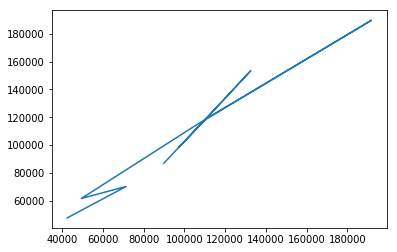

In [89]:
plt.plot(y_test,predictions)

# Backward Elimination

# Removing variables those have p val > 0.5 

# Removing Highest p value variable one at a time and running model again and again till all variables with high p val are removed


In [90]:
import statsmodels.formula.api as sm

In [91]:
df_Opt = np.append(arr = np.ones((50,1)).astype(int),values = df[columns] ,axis =1)

In [94]:
df_Opt

array([[1.0000000e+00, 1.6534920e+05, 1.3689780e+05, 4.7178410e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.6259770e+05, 1.5137759e+05, 4.4389853e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.5344151e+05, 1.0114555e+05, 4.0793454e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.4437241e+05, 1.1867185e+05, 3.8319962e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4210734e+05, 9.1391770e+04, 3.6616842e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.3187690e+05, 9.9814710e+04, 3.6286136e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3461546e+05, 1.4719887e+05, 1.2771682e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3029813e+05, 1.4553006e+05, 3.2387668e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.2054252e+05, 1.4871895e+05, 3.1161329e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.2333488e+05,

In [95]:
regressor_OLS = sm.OLS(endog=df[response],exog=df_Opt).fit()

In [96]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 20 May 2018   Prob (F-statistic):           1.34e-27
Time:                        00:47:10   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4            41.8870   3256.039      0.013      0.990   -6520.229    6604.003
x5           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
columns = ['R&D Spend','Administration','Marketing Spend','State_Florida']
df_Opt = np.append(arr = np.ones((50,1)).astype(int),values = df[columns] ,axis =1)
regressor_OLS = sm.OLS(endog=df[response],exog=df_Opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 20 May 2018   Prob (F-statistic):           8.49e-29
Time:                        01:01:09   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
columns = ['R&D Spend','Administration','Marketing Spend']
df_Opt = np.append(arr = np.ones((50,1)).astype(int),values = df[columns] ,axis =1)
regressor_OLS = sm.OLS(endog=df[response],exog=df_Opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 20 May 2018   Prob (F-statistic):           4.53e-30
Time:                        01:03:27   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
columns = ['R&D Spend','Marketing Spend']
df_Opt = np.append(arr = np.ones((50,1)).astype(int),values = df[columns] ,axis =1)
regressor_OLS = sm.OLS(endog=df[response],exog=df_Opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 20 May 2018   Prob (F-statistic):           2.16e-31
Time:                        01:03:45   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
columns = ['R&D Spend']
df_Opt = np.append(arr = np.ones((50,1)).astype(int),values = df[columns] ,axis =1)
regressor_OLS = sm.OLS(endog=df[response],exog=df_Opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 20 May 2018   Prob (F-statistic):           3.50e-32
Time:                        01:08:54   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""